In [ ]:
%pip install yfinance

In [ ]:
 # Importamos as bibliotecas necessárias
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
base_treinamento = yf.download('WEGE3.SA', start="2023-01-01", end="2024-01-01", progress=False)['Close']
# Queremos remover eventuais valores nulos. Nessa base eles não são # muitos.
base_treinamento = base_treinamento.dropna()
#Vamos normalizar os valores para a faixa de 0 a 1. Isso ajuda no treinamento da rede.
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

YF.download() has changed argument auto_adjust default to True


In [ ]:
previsores = []
preco_real = []
# Variamos i a partir de 90, pois esse é o tamanho da janela que    # estamos observando.
for i in range(90, 248):
    previsores.append(base_treinamento_normalizada[i-90:i, 0])
    preco_real.append(base_treinamento_normalizada[i, 0])
# Transformamos os previsores e os preços reais em um array com formato correto para o treinamento na rede.
previsores, preco_real = np.array(previsores), np.array(preco_real)
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

In [ ]:
regressor = Sequential()
regressor.add(Dense(units = 100, activation = 'relu', input_dim = previsores.shape[1])) # Camada de entrada
regressor.add(Dropout(0.3)) # Dropout para regularização
regressor.add(Dense(units = 50, activation = 'relu')) # Camada oculta
regressor.add(Dropout(0.3))
regressor.add(Dense(units = 1, activation = 'linear')) # Camada de saída

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8022 - mean_absolute_error: 0.7156
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1681 - mean_absolute_error: 0.3220
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1446 - mean_absolute_error: 0.2898
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0705 - mean_absolute_error: 0.2148
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0928 - mean_absolute_error: 0.2462
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0496 - mean_absolute_error: 0.1723
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0725 - mean_absolute_error: 0.2218
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0686 - mean_absolute_error: 0.2104
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0588 - mean_absolute_error: 0.1923
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0603 - mean_absolute_error: 0.1877
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/ste

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0168 - mean_absolute_error: 0.0999
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0230 - mean_absolute_error: 0.1124 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0167 - mean_absolute_error: 0.1014
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0172 - mean_absolute_error: 0.1012
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0153 - mean_absolute_error: 0.0920 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0147 - mean_absolute_error: 0.0961 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0154 - mean_absolute_error: 0.0942
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0184 - mean_absolute_error: 0.1042 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0197 - mean_absolute_error: 0.1033
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0150 - mean_absolute_error: 0.0983 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

In [ ]:
base_teste = yf.download('WEGE3.SA', start="2024-01-01", end="2024-06-01", progress=False)['Close']
# Queremos remover eventuais valores nulos. Nessa base eles não são # muitos.
base_teste = base_teste.dropna()
#Vamos normalizar os valores para a faixa de 0 a 1. Isso ajuda no treinamento da rede.
normalizador = MinMaxScaler(feature_range=(0,1))
base_teste_normalizada = normalizador.fit_transform(base_teste)

# Precisamos das últimas 90 entradas dos dados de treino para começar os testes. Então concatenamos as duas bases.
base_completa = pd.concat((base_treinamento, base_teste), axis = 0)
# Agora extraímos da base completa apenas a porção que precisamos e # aplicamos o mesmo normalizador.
entradas = base_completa[(len(base_treinamento)  - 90):].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)

# Aplicamos a mesma estruturação e antes, separando de 90 em 90     # dias, movendo um dia por vez.
X_teste = []
for i in range(90, len(entradas)): # Adjust the range to start from 90
    X_teste.append(entradas[i-90:i, 0])

X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1)) # Now X_teste is 3D
previsoes = regressor.predict(X_teste)
previsoes = normalizador.inverse_transform(previsoes)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error

# Ajuste o índice para corresponder ao número de previsões
real = base_teste.values[len(base_teste) - len(previsoes):]

# Cálculo do MAE
mae = mean_absolute_error(real, previsoes)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 1.1646599769592285


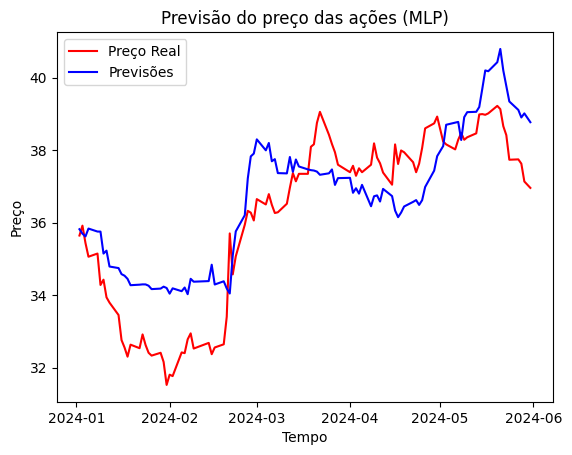

In [ ]:
plt.plot(base_teste.index, base_teste.values, color = 'red', label = 'Preço Real')
plt.plot(base_teste.index, previsoes, color = 'blue', label = 'Previsões')
plt.title('Previsão do preço das ações (MLP)')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.legend()
plt.savefig('prev_weg.png')
plt.show()